<a href="https://colab.research.google.com/github/vaishnavir33/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DATASET
!pip install bing-image-downloader

In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("pizza",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://media.timeout.com/images/103437036/image.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/P-Ojv_1veCg/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/CxZM0PM77Us/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/VOIIGsNk4C0/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg/1200px-Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg/1200px-Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Eataly_Las_Vegas_-_Feb_2019_-_Stierch_12.jpg/1200px-Eataly_Las_Veg

In [4]:
downloader.download("penguin",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island–Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg/1200px-South_Shetland-2016-Deception_Island–Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg
[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island–Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg/1200px-South_Shetland-2016-Deception_Island–Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg
[!] Error:: 'ascii' codec can't encode character '\u2013' in position 70: ordinal not in range(128)
[%] Downloading Image #1 from http://www.animalspot.net/wp-content/uploads/2017/08/Baby-Penguin.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/01/16/10/emperor-penguin.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.w

In [5]:
downloader.download("red rose",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://orchidflowers.files.wordpress.com/2011/03/small_red_rose.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://shakespeareoxfordfellowship.org/wp-content/uploads/rose_Awesome-Red.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.flyingflowers.co.nz/content/images/thumbs/0004092_red-roses.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Beauty_of_Red_Rose.jpg/1200px-Beauty_of_Red_Rose.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Beauty_of_Red_Rose.jpg/1200px-Beauty_of_Red_Rose.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Beauty_of_Red_Rose.jpg/1200px-Beauty_of_Red_Rose.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #4 from http://1.bp.blogspot.com/-ptKYY2115S0/UKpOHeIKHpI/AAAAAAAACEI/Q7Jje

In [6]:
#PREPROCESS DATA
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

In [7]:
target = [] 
images = [] # Matrix Format
flat_data = [] 
DATADIR = '/content/images'
CATEGORIES = ['pizza','penguin','red rose']

for i in CATEGORIES:
  class_num = CATEGORIES.index(i) 
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
    #print(img_resized.shape)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [8]:
len(flat_data[0])

67500

In [9]:
150*150*3


67500

In [10]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<BarContainer object of 3 artists>

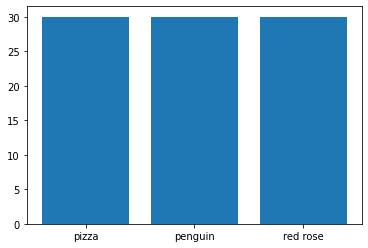

In [11]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
             ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [15]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
accuracy_score(y_pred,y_test)

0.9629629629629629

In [18]:
confusion_matrix(y_pred,y_test)

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  7]])

In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



In [20]:
#Save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))


In [21]:
model = pickle.load(open('img_model.p','rb'))

Enter the urlhttps://images.indulgexpress.com/uploads/user/imagelibrary/2018/11/2/original/285A5419.JPG
(2240, 3360, 3)
 PREDICTED OUTPUT : pizza


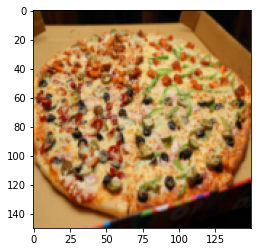

In [23]:
#Testing a new image
flat_data = []
url = input('Enter the url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')

Enter the urlhttps://media.wired.com/photos/5f2d7c2191d87e6680b80936/master/pass/Science_climatedesk_453801484.jpg
(1600, 2400, 3)
 PREDICTED OUTPUT : penguin


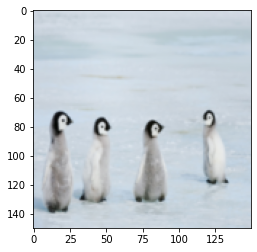

In [24]:
flat_data = []
url = input('Enter the url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')

Enter the urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlVUCvqvVIJQCQQrBSoWDnxVJhdJFORrfZ-Q&usqp=CAU.jpg
(275, 183, 3)
 PREDICTED OUTPUT : red rose


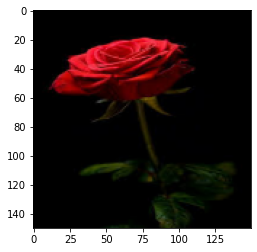

In [28]:
flat_data = []
url = input('Enter the url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')